<a href="https://colab.research.google.com/github/AnnaBujniewicz/Masters_thesis/blob/main/1_Bibliometric_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import plotly as py
import plotly.graph_objs as go
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from itertools import combinations
import networkx as nx
import community as community_louvain
import itertools
import spacy
from spacy.matcher import PhraseMatcher

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/AnnaBujniewicz/data_stuffs/master/dataframe.csv", sep = ";")
df.head()

,authors,title,year,source title,cited by,abstract,author keywords,references,conference name,document type
0,"Li X., Wu P., Wang W.",Incorporating stock prices and news sentiments...,2020,Information Processing and Management,17,Stock prediction via market data analysis is a...,Deep learning; News sentiment analysis; Stock ...,"Aiolli, F., Donini, M., EasyMKL: A scalable mu...",NaN,Article
1,"Maqsood H., Mehmood I., Maqsood M., Yasir M., ...",A local and global event sentiment based effic...,2020,International Journal of Information Management,16,Stock exchange forecasting is an important asp...,Deep learning; Event sentiment; Regression; St...,"Antweiler, W., Frank, M.Z., Is all that talk j...",NaN,Article
2,"Audrino F., Sigrist F., Ballinari D.",The impact of sentiment and attention measures...,2020,International Journal of Forecasting,13,We analyze the impact of sentiment and attenti...,High-dimensional regression; Investor attentio...,"Andersen, T.G., Bollerslev, T., Diebold, F.X.,...",NaN,Article
3,"Ananthi M., Vijayakumar K.",Stock market analysis using candlestick regres...,2020,Journal of Ambient Intelligence and Humanized ...,9,Stock market data is a time-series data in whi...,Candle-stick pattern; Machine learning; Regres...,"Ahmed, S.T., A study on multi objective optima...",NaN,Article
4,"Jin Z., Yang Y., Liu Y.",Stock closing price prediction based on sentim...,2020,Neural Computing and Applications,7,Stock market prediction has been identified as...,Attention mechanism; Empirical mode decomposit...,"Fama, E.F., Market efficiency, long-term retur...",NaN,Article


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   authors          113 non-null    object
 1   title            113 non-null    object
 2   year             113 non-null    int64 
 3   source title     113 non-null    object
 4   cited by         113 non-null    int64 
 5   abstract         113 non-null    object
 6   author keywords  105 non-null    object
 7   references       113 non-null    object
 8   conference name  27 non-null     object
 9   document type    113 non-null    object
dtypes: int64(2), object(8)
memory usage: 9.0+ KB


#1 Count-based measures

## Document type

In [ ]:
Counter(df['document type'])

Counter({'Article': 86, 'Conference Paper': 27})

In [ ]:
document_type = df.groupby('document type').agg('count')
document_labels = document_type.authors.sort_values().index
document_counts = document_type.authors.sort_values()

In [ ]:
trace = go.Bar(
            x=document_type["authors"].sort_values().index,
            y=document_type["authors"].sort_values()
            )

data = [trace]

layout = go.Layout(
    yaxis=dict(
        title='Document Type',
    )
)

fig = go.Figure(data=data, layout=layout)
fig

Text(0.5, 0, '')

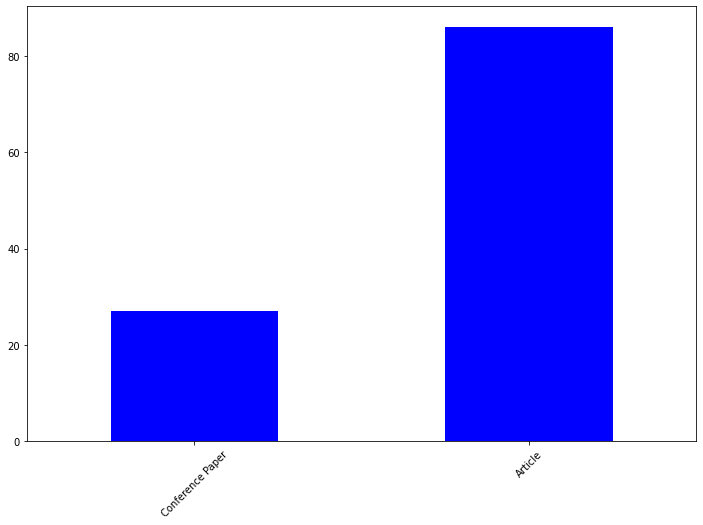

In [ ]:
document_counts.plot.bar(figsize = (12,8), cmap = "winter", legend=None )
plt.xticks(rotation=45)
plt.xlabel('')

## Years

In [ ]:
# make dataframe using timeSeries method to plot graphs
growth = df.year.value_counts().rename_axis('year').reset_index(name='count')
growth

,year,count
0,2019,27
1,2018,23
2,2017,16
3,2020,14
4,2015,12
5,2016,10
6,2014,9
7,2021,2


In [ ]:
trace = go.Bar(
    x = growth['year'],
    y = growth['count']
)

data = [trace]

layout = go.Layout(
    yaxis=dict(
        title='Number of Publications',
    ),
    xaxis=dict(
        title='Year',
    )
)

fig = go.Figure(data=data, layout=layout)
fig

Text(0.5, 0, '')

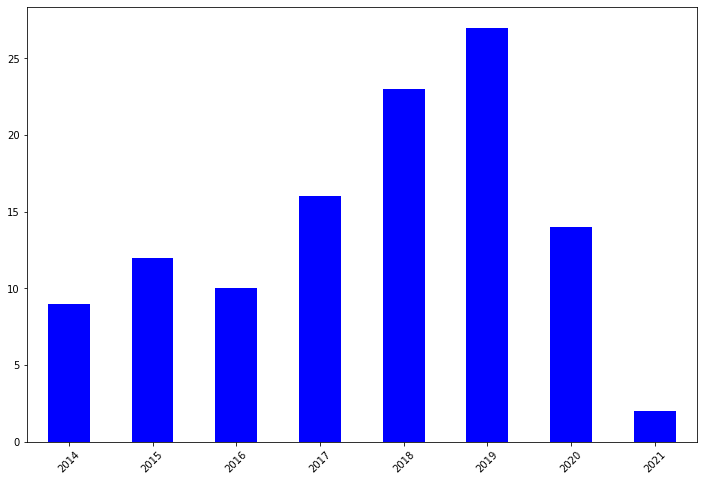

In [ ]:
growth.set_index('year').sort_index().plot.bar(figsize = (12,8), cmap = "winter", legend=None)
plt.xticks(rotation=45)
plt.xlabel('')

## Ciations 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 <a list of 48 Text major ticklabel objects>)

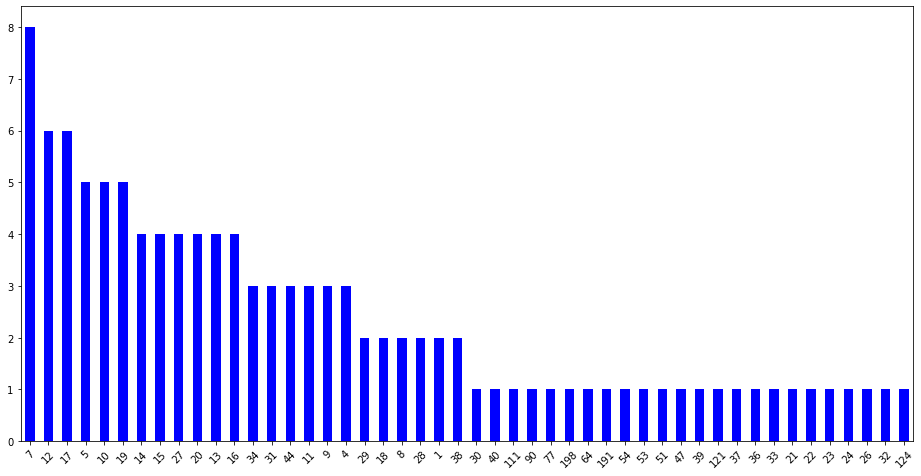

In [ ]:
#Visualization of the number of citations that the articles get
#The vast majority has 7 citations
df["cited by"].value_counts().plot.bar(figsize = (16,8), cmap = "winter")
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

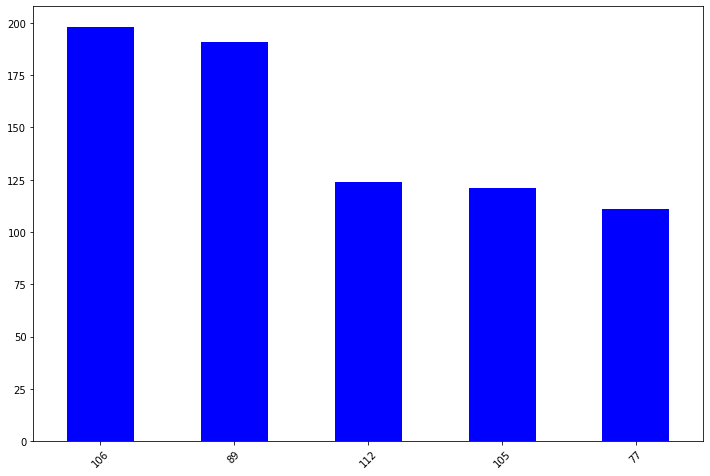

In [ ]:
#Finding the most cited articles
#Number 153 has a lot of citation
df["cited by"].sort_values(ascending = False).head(5).plot.bar(figsize = (12,8), cmap = "winter")
plt.xticks(rotation=45)

In [ ]:
# Distribution of the number of citations
trace = go.Bar(
            x=df["cited by"].value_counts().index,
            y=df["cited by"].value_counts()
            )

data = [trace]

layout = go.Layout(
    yaxis=dict(
        title='Number of citations',
    )
)

fig = go.Figure(data=data, layout=layout)
fig

Text(0.5, 0, '')

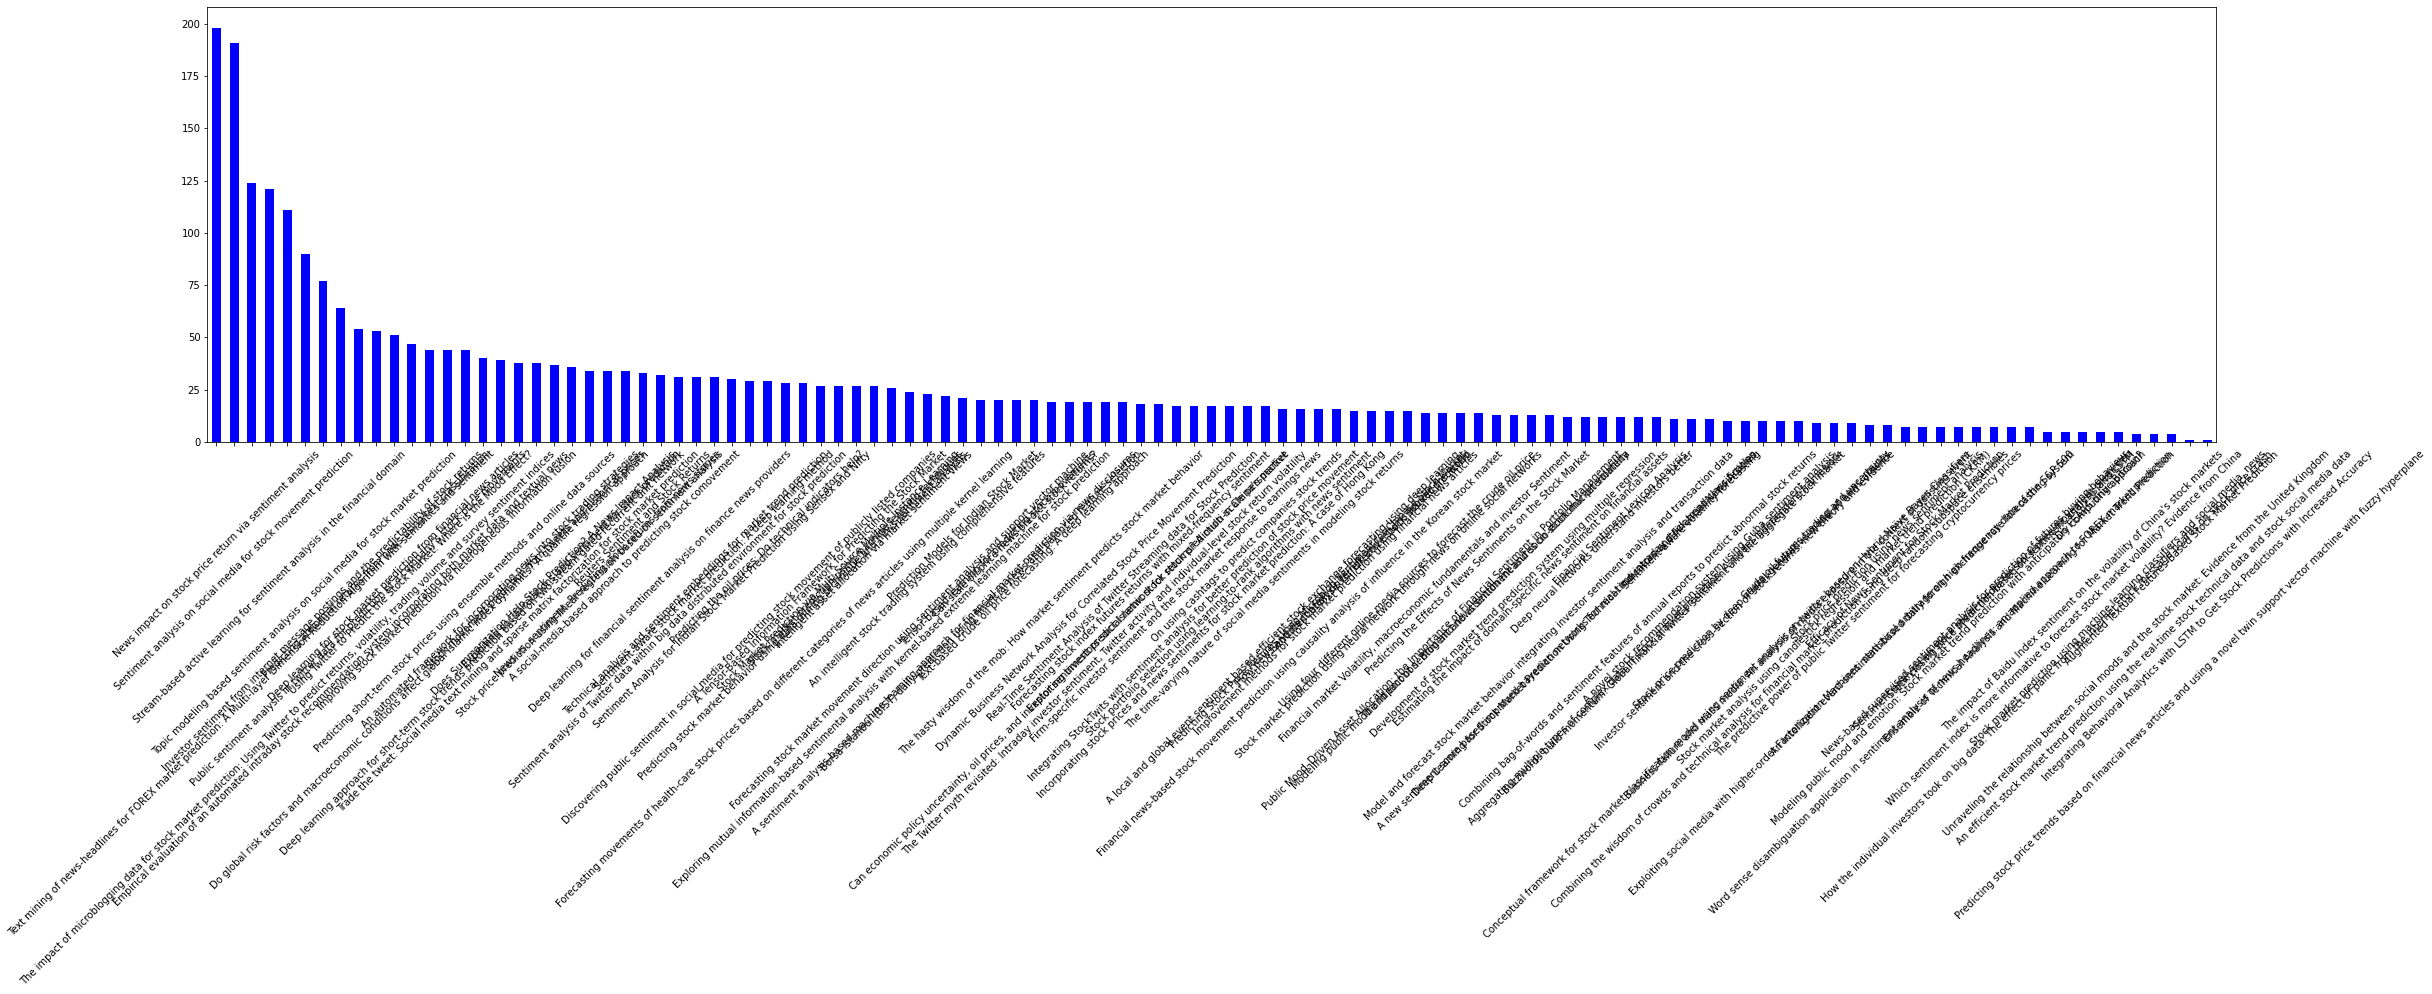

In [ ]:
df.set_index("title")["cited by"].sort_values(ascending = False).plot.bar(figsize = (36,8), cmap = "winter")
plt.xticks(rotation=45)
plt.xlabel('')

In [ ]:
# Show most highly cited articles in the dataset
top_15 = df.sort_values(['cited by'], ascending = False)[:15]
top_15.head()

,authors,title,year,source title,cited by,abstract,author keywords,references,conference name,document type
106,"Li X., Xie H., Chen L., Wang J., Deng X.",News impact on stock price return via sentimen...,2014,Knowledge-Based Systems,198,Financial news articles are believed to have i...,Experiment; News impact; Prediction; Sentiment...,"Abbasi, A., Chen, H., Salem, A., Sentiment ana...",NaN,Article
89,"Nguyen T.H., Shirai K., Velcin J.",Sentiment analysis on social media for stock m...,2015,Expert Systems with Applications,191,The goal of this research is to build a model ...,Classification; Message board; Opinion mining;...,"Antweiler, W., Frank, M.Z., Is all that talk j...",NaN,Article
112,"Khadjeh Nassirtoussi A., Aghabozorgi S., Ying ...",Text mining of news-headlines for FOREX market...,2015,Expert Systems with Applications,124,In this paper a novel approach is proposed to ...,FOREX prediction; Market prediction; Market se...,"Aghdam, M.H., Ghasem-Aghaee, N., Basiri, M.E.,...",NaN,Article
105,"Smailović J., Grčar M., Lavrač N., Žnidaršič M.",Stream-based active learning for sentiment ana...,2014,Information Sciences,121,Studying the relationship between public senti...,Granger causality; Positive sentiment probabil...,"Abdi, H., Bonferroni and Šidák corrections for...",NaN,Article
77,"Oliveira N., Cortez P., Areal N.",The impact of microblogging data for stock mar...,2017,Expert Systems with Applications,111,"In this paper, we propose a robust methodology...",Data and text mining; Regression; Stock market...,"Al Nasseri, A., Tucker, A., de Cesare, S., Qua...",NaN,Article


In [ ]:
# Make visualization 
trace = go.Bar(
            x=top_15['title'],
            y=top_15['cited by']
    )

data = [trace]

layout = go.Layout(
    yaxis=dict(
        title='Times Cited',
    )
)

fig = go.Figure(data=data, layout=layout)
fig

Text(0.5, 0, '')

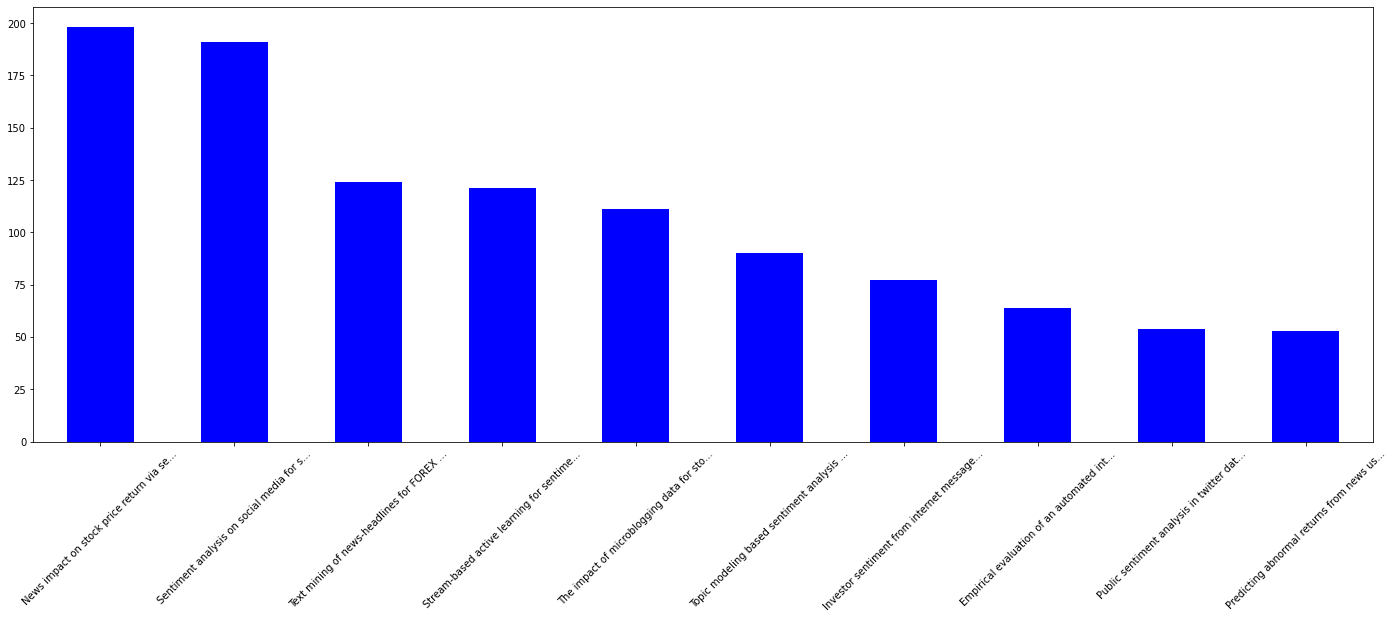

In [ ]:
df_title = df.set_index("title")
df_title.index = df_title.index.map(lambda x: x[:40] + "...")
df_title["cited by"].sort_values(ascending = False).head(10).plot.bar(figsize = (24,8), cmap = "winter")
plt.xticks(rotation=45)
plt.xlabel('')

## Authors

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

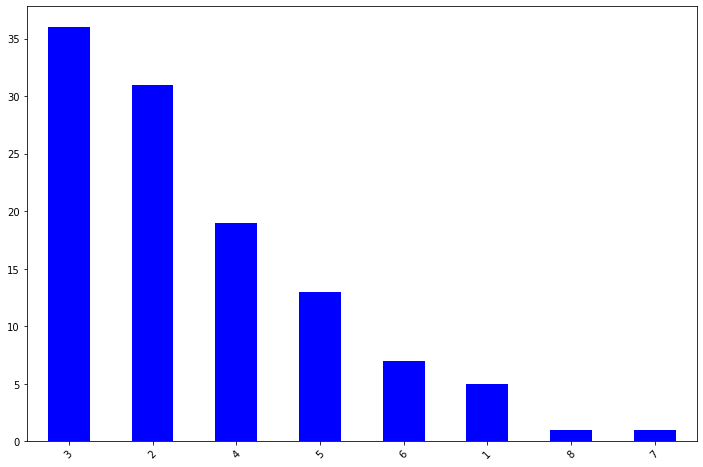

In [ ]:
df=pd.concat([df,df.authors.str.split(',',expand=True)],1)
df['num-authors'] = df.iloc[:, 10:].notnull().sum(axis=1)
#Number of authors working together on a given paper
df["num-authors"].value_counts().plot.bar(figsize = (12,8), cmap = "winter")
plt.xticks(rotation=45)

In [ ]:
df1 = df["authors"].map(lambda x: x.split(","))
#Using counter to find the 10 authors who wrote the most papers
Counter(itertools.chain(*df1)).most_common(10)

[(' Cambria E.', 5),
 ('Li X.', 4),
 (' Zhang Y.', 4),
 ('Zhang X.', 3),
 (' Fang B.', 3),
 (' Wang D.', 3),
 (' Li P.', 3),
 (' Li Q.', 3),
 (' Mehmood I.', 2),
 (' Maqsood M.', 2)]

Text(0.5, 0, '')

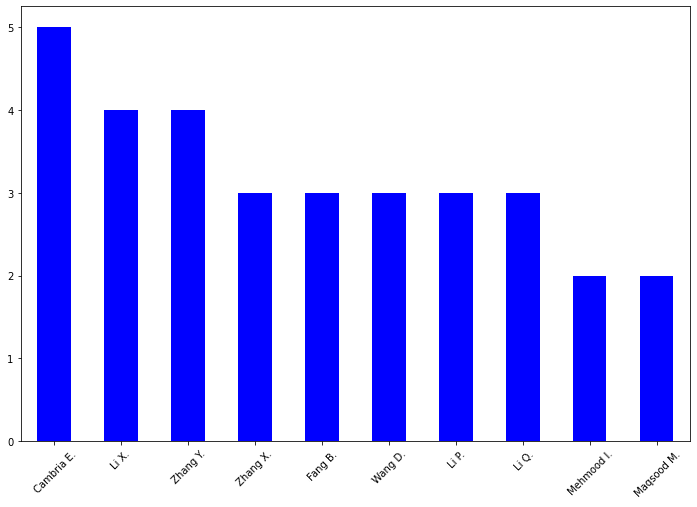

In [ ]:
#Creating a dataframe from the counter data for the visualisation
common_authors = pd.DataFrame(Counter(itertools.chain(*df1)).most_common(10)).set_index(0)
#Changing the color
common_authors.plot.bar(figsize = (12,8), cmap = "winter", legend=None)
plt.xticks(rotation=45)
plt.xlabel('')

## Countries



In [ ]:
country_df = pd.read_csv("https://raw.githubusercontent.com/ztakac18/MS_thesis_publish/master/14-21.csv")
country_df = country_df[country_df["Title"].isin(list(df["title"]))].reset_index()

In [ ]:
#Finding all the countries within the Affiliation column
#Loading the Spacy model for English
nlp = spacy.load('en_core_web_sm')
#Creating a matcher instance
matcher = PhraseMatcher(nlp.vocab)
#Creating a new dataframe column containing all the geographic locations from the Affiliation column
country_df["country"] = country_df["Affiliations"].map(lambda x: [ent.text for ent in list(nlp(str(x)).ents) if ent.label_ == 'GPE'])
# removing common cities
country_df["country"] = country_df["country"].apply(lambda x: [item for item in x if  item  not in ["Beijing", 'Hong Kong', 'Seoul', 'Chicago', 'Kowloon']])
#Using counter on the country column to find the most reocurring locations
Counter(itertools.chain(*country_df["country"])).most_common(10)

[('China', 48),
 ('United States', 29),
 ('India', 18),
 ('United Kingdom', 15),
 ('Germany', 13),
 ('Singapore', 13),
 ('Pakistan', 10),
 ('South Korea', 8),
 ('Taiwan', 7),
 ('Italy', 7)]

Text(0.5, 0, '')

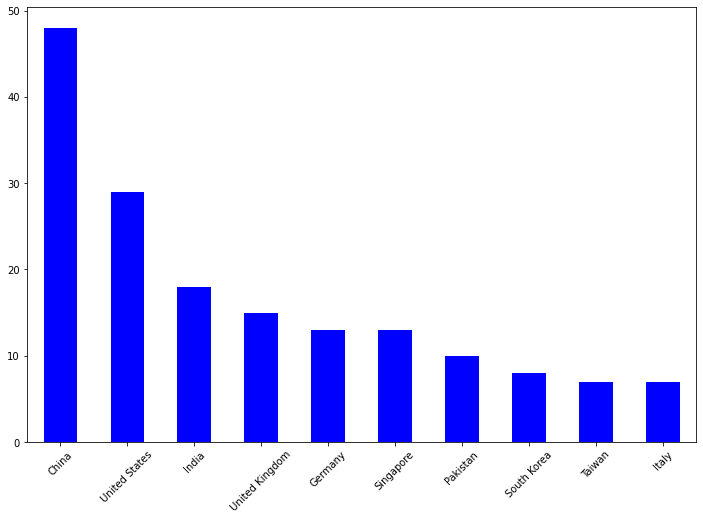

In [ ]:
#Creating a dataframe from the counter data for the visualisation
common_countries = pd.DataFrame(Counter(itertools.chain(*country_df["country"])).most_common(10)).set_index(0)
#Changing the color
common_countries.plot.bar(figsize = (12,8), cmap = "winter", legend=None)
plt.xticks(rotation=45)
plt.xlabel('')

In [ ]:
#Creating an empty dictionary containing dataframes
dict_of_df = {}
#Iterating over the years 2014-2021
for i in range(2014,2022):
#Creating a dataframe with the 7 most common countries for every year
    dict_of_df["df_{}".format(i)] = pd.DataFrame(data = (Counter(itertools.chain(*country_df[country_df["Year"]==i]["country"])).most_common(5))).set_index(0).rename(columns={1:i})

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

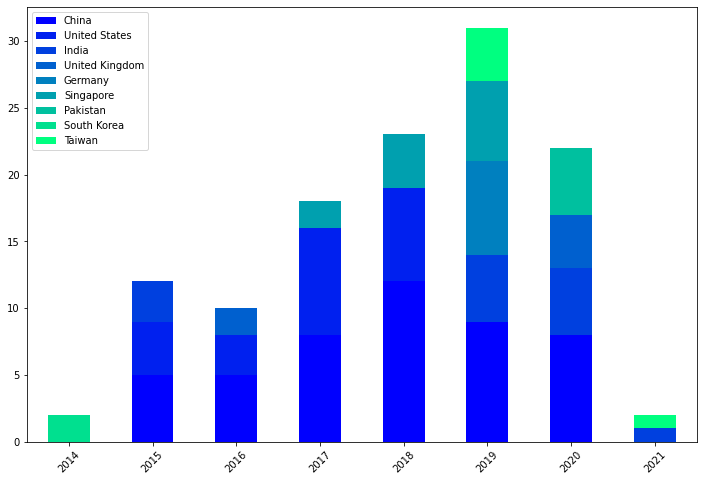

In [ ]:
#Creating a new dataframe through concatinating the previously created dataframes based on the index and transposing it
plotdata = pd.concat([dict_of_df["df_2014"], dict_of_df["df_2015"], dict_of_df["df_2016"], dict_of_df["df_2017"], dict_of_df["df_2018"], dict_of_df["df_2019"], dict_of_df["df_2020"], dict_of_df["df_2021"]], axis=1).T
#Making a stacked bar chart for the countries of interest
plotdata[list(pd.DataFrame(Counter(itertools.chain(*country_df["country"])).most_common(9)).iloc[:,0])].plot(kind="bar", stacked=True, figsize = (12,8), cmap = "winter")
plt.xticks(rotation=45)

## Keywords

In [ ]:
keywords_df = df
keywords_df.dropna(inplace=True, subset=["author keywords"])
keywords_df["keywords"] = keywords_df["author keywords"].map(lambda x: x.split(";"))

In [ ]:
Counter(itertools.chain(*keywords_df["keywords"])).most_common(10)

[(' Sentiment analysis', 24),
 (' Stock market', 11),
 (' Twitter', 10),
 (' Stock market prediction', 9),
 (' Text mining', 9),
 ('Deep learning', 8),
 (' Stock prediction', 8),
 (' Investor sentiment', 8),
 (' Prediction', 6),
 (' Social media', 6)]

Text(0.5, 0, '')

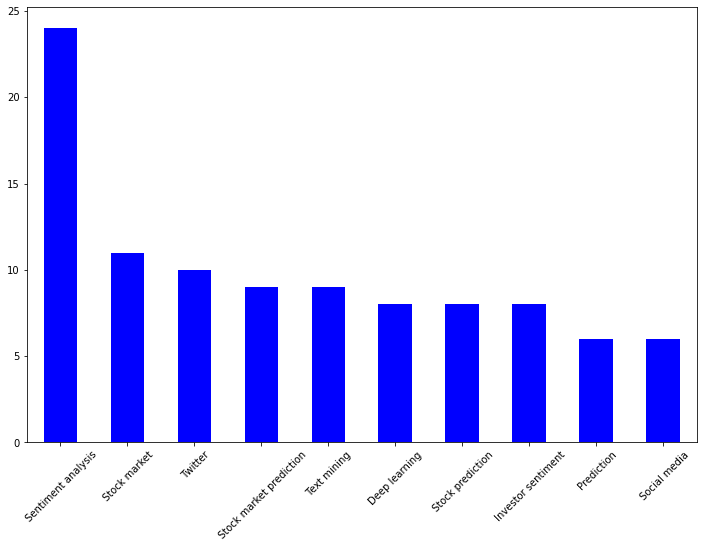

In [ ]:
#Creating a dataframe from the counter data for the visualisation
common_keywords = pd.DataFrame(Counter(itertools.chain(*keywords_df["keywords"])).most_common(10)).set_index(0)
#Changing the color
common_keywords.plot.bar(figsize = (12,8), cmap = "winter", legend=None)
plt.xticks(rotation=45)
plt.xlabel('')

In [ ]:
#Creating an empty dictionary containing dataframes
dict_of_df_key = {}
#Iterating over the years 2014-2021
for i in range(2014,2022):
#Creating a dataframe with the 7 most common countries for every year
    dict_of_df_key["df_{}".format(i)] = pd.DataFrame(data = (Counter(itertools.chain(*keywords_df[keywords_df["year"]==i]["keywords"])).most_common(10))).set_index(0).rename(columns={1:i})

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

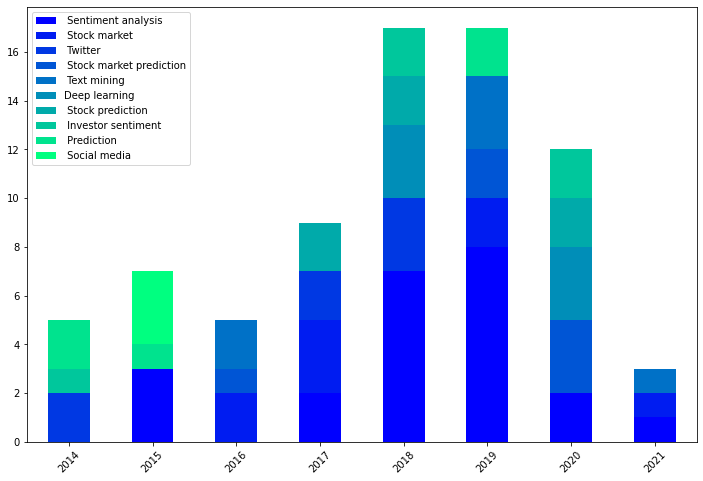

In [ ]:
#Creating a new dataframe through concatinating the previously created dataframes based on the index and transposing it
plotdata = pd.concat([dict_of_df_key["df_2014"], dict_of_df_key["df_2015"], dict_of_df_key["df_2016"], dict_of_df_key["df_2017"], dict_of_df_key["df_2018"], dict_of_df_key["df_2019"], dict_of_df_key["df_2020"], dict_of_df_key["df_2021"]], axis=1).T
#Making a stacked bar chart for the countries of interest
plotdata[list(pd.DataFrame(Counter(itertools.chain(*keywords_df["keywords"])).most_common(10)).iloc[:,0])].plot(kind="bar", stacked=True, figsize = (12,8), cmap = "winter")
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

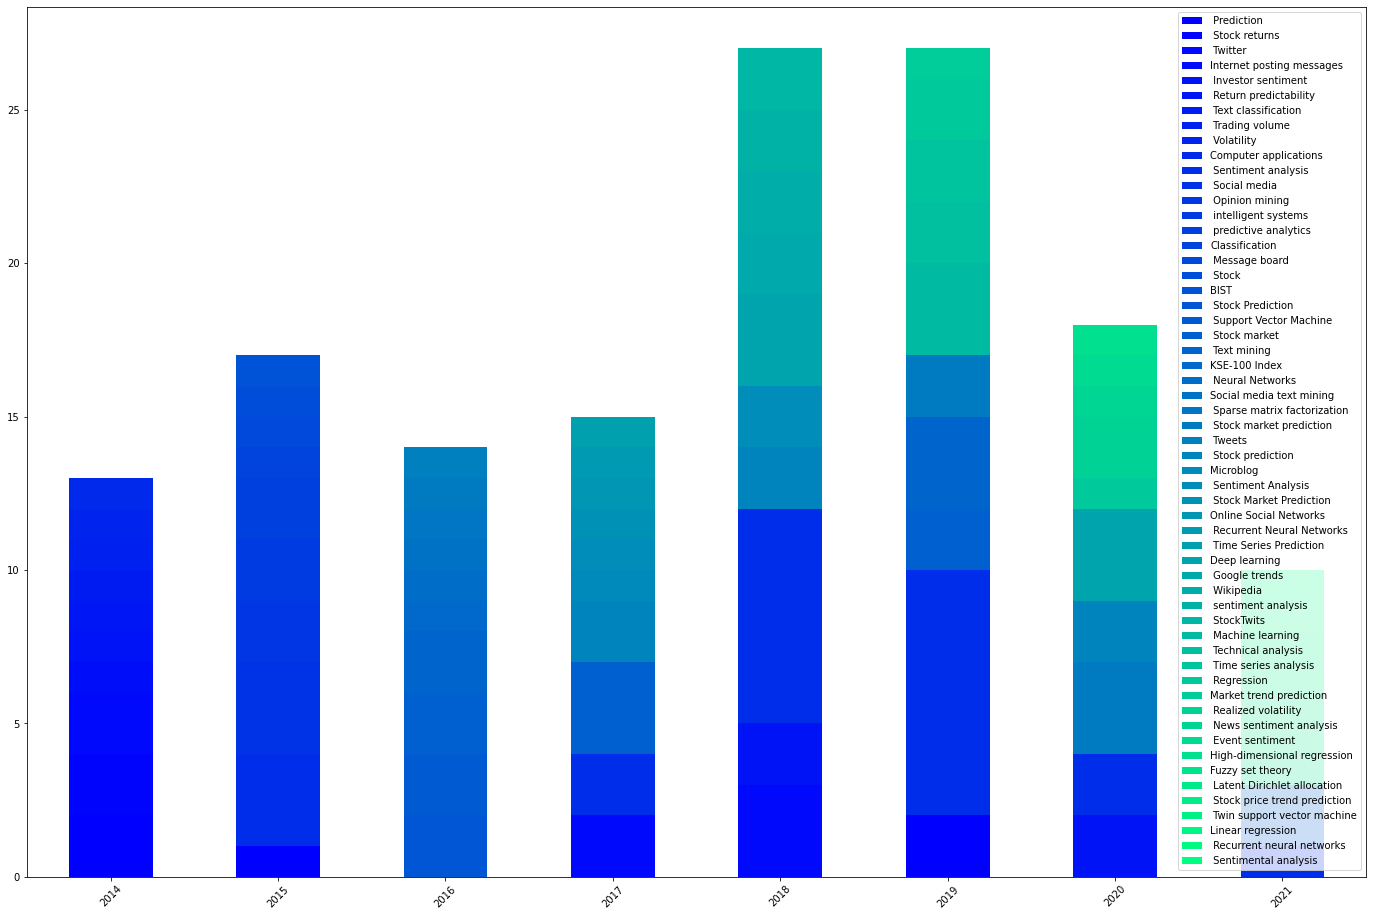

In [ ]:
plotdata.plot(kind="bar", stacked=True, figsize = (24,16), cmap = "winter")
plt.xticks(rotation=45)

#2 Topic modeling

In [ ]:
df["tokenized"] = df["abstract"].map(lambda x: x.lower())
df["tokenized"] = df["tokenized"].map(lambda x: word_tokenize(x))
c = '©'
inter = "’"
stoplist = set(stopwords.words('english') + list(punctuation)+list(c)+list(inter))
df["tokenized"] = df["tokenized"].map(lambda x: [word for word in x if word not in stoplist])
lemmatizer = WordNetLemmatizer()
df["tokenized"] = df["tokenized"].map(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [ ]:
#Creating a dictionary from the tokenized abstract
dictionary= Dictionary(df['tokenized'])
#Creating a corpus from the dictionary
corpus = [dictionary.doc2bow(doc) for doc in df['tokenized']]

In [ ]:
#Calculating a coherence score for the different number of topics
#Creating an empty set for coherence
coherence = []
#Creating a range
I = range(1,21)
#Iterating over the range to check the coherence for each number of topics
for i in I:
    lda = LdaModel(corpus, id2word=dictionary, num_topics=i)
    coherence_model_lda = CoherenceModel(model=lda, texts=df['tokenized'].tolist(), dictionary=dictionary, coherence='c_v')
    coherence.append(coherence_model_lda.get_coherence())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



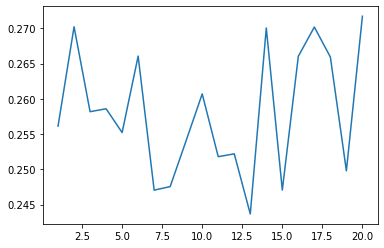

In [ ]:
#Visualizing the coherence plot
sns.lineplot(I, coherence)

In [ ]:
#Creating LDA model
lda = LdaModel(corpus, id2word=dictionary, num_topics=4)

In [ ]:
#Printing the topics out
#They seem rather similar, it is difficult to understand the differences between them based on reading
lda.print_topics()

[(0,
  '0.033*"stock" + 0.020*"market" + 0.015*"news" + 0.015*"sentiment" + 0.013*"data" + 0.012*"analysis" + 0.011*"prediction" + 0.008*"model" + 0.008*"price" + 0.007*"result"'),
 (1,
  '0.020*"stock" + 0.017*"market" + 0.012*"news" + 0.012*"model" + 0.012*"prediction" + 0.010*"price" + 0.010*"data" + 0.009*"information" + 0.007*"sentiment" + 0.006*"financial"'),
 (2,
  '0.032*"stock" + 0.025*"sentiment" + 0.016*"market" + 0.015*"price" + 0.014*"model" + 0.012*"prediction" + 0.011*"data" + 0.010*"news" + 0.008*"financial" + 0.007*"analysis"'),
 (3,
  '0.020*"sentiment" + 0.017*"stock" + 0.013*"market" + 0.013*"data" + 0.010*"model" + 0.009*"prediction" + 0.007*"return" + 0.007*"news" + 0.007*"study" + 0.007*"price"')]

In [ ]:
# defining a function that will add the dominant topic to each index value
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['dominant_topic', 'perc_contribution', 'topic_keywords']
        # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [ ]:
#Adding the dominant topics to the dataframe
df2 = format_topics_sentences(lda, corpus, df["tokenized"])
df2.head()

,dominant_topic,perc_contribution,topic_keywords,tokenized
0,0.0,0.5940,"stock, market, news, sentiment, data, analysis...","[stock, prediction, via, market, data, analysi..."
1,2.0,0.9942,"stock, sentiment, market, price, model, predic...","[stock, exchange, forecasting, important, aspe..."
2,3.0,0.9846,"sentiment, stock, market, data, model, predict...","[analyze, impact, sentiment, attention, variab..."
3,0.0,0.9928,"stock, market, news, sentiment, data, analysis...","[stock, market, data, time-series, data, stock..."
4,1.0,0.8844,"stock, market, news, model, prediction, price,...","[stock, market, prediction, identified, import..."


In [ ]:
#Checking which topics are the most "popular"
df2["dominant_topic"].value_counts(normalize = True)

2.0    0.542857
0.0    0.209524
3.0    0.152381
1.0    0.095238
Name: dominant_topic, dtype: float64

In [ ]:
df2["year"]=  df["year"]
#Creating an empty dictionary containing dataframes
dict_of_df_topic = {}
#Iterating over the years 2014-2021
for i in range(2014,2022):
#Creating a dataframe with the 7 most common countries for every year
    dict_of_df_topic["df_{}".format(i)] = pd.DataFrame(data = (Counter(itertools.chain(df2[df2["year"]==i]["dominant_topic"])).most_common(5))).set_index(0).rename(columns={1:i})

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

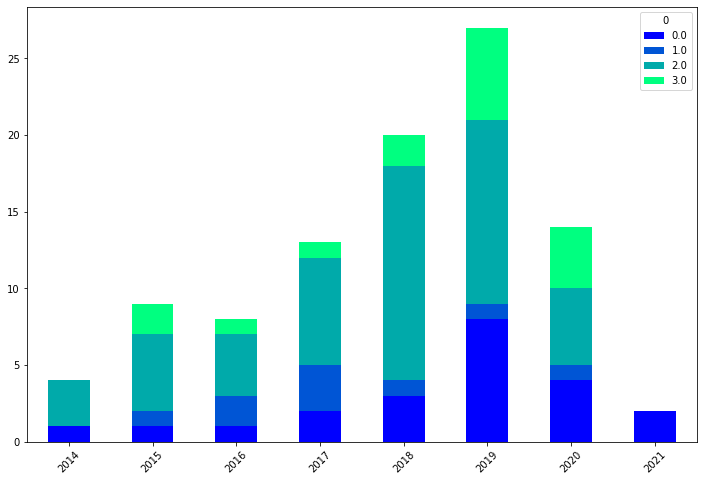

In [ ]:
#Creating a new dataframe through concatinating the previously created dataframes based on the index and transposing it
plotdata = pd.concat([dict_of_df_topic["df_2014"], dict_of_df_topic["df_2015"], dict_of_df_topic["df_2016"], dict_of_df_topic["df_2017"], dict_of_df_topic["df_2018"], dict_of_df_topic["df_2019"], dict_of_df_topic["df_2020"], dict_of_df_topic["df_2021"]], axis=1).T
#Making a stacked bar chart for the countries of interest
plotdata[[0.0,1.0,2.0,3.0]].plot(kind="bar", stacked=True, figsize = (12,8), cmap = "winter")
plt.xticks(rotation=45)

#3 Network analysis

In [ ]:
# dataframes with one author/reference per cell
authors_edge = df.iloc[:, 10:18]
references_edge = df.references.str.split(';',expand=True)

In [ ]:
# creating a list of all possible author/reference combinations
authors_edgelist = []
for x in range(len(authors_edge.index)):
  authors_edgelist.append(list(combinations(authors_edge.iloc[x,:].dropna().tolist(), 2)))

references_edgelist = []
for x in range(len(references_edge.index)):
  references_edgelist.append(list(combinations(references_edge.iloc[x,:].dropna().tolist(), 2)))

In [ ]:
# unpacking the list of lists
authors_edgelist = [item for sublist in authors_edgelist for item in sublist]
references_edgelist = [item for sublist in references_edgelist for item in sublist]

In [ ]:
# turning it into a dataframe
authors_edgelist = pd.DataFrame(authors_edgelist)
references_edgelist = pd.DataFrame(references_edgelist)

In [ ]:
# creating two columns to check for repetitions (as connections can go both ways)
authors_edgelist["weight_check_1"] = authors_edgelist[0]+authors_edgelist[1]
authors_edgelist["weight_check_2"] = authors_edgelist[1]+authors_edgelist[0]
# only one needed for citation, as this network is directional
references_edgelist["weight_check_1"] = references_edgelist[0]+references_edgelist[1]

In [ ]:
# making a list of all strings in wieght check 2 that exist in weight check 1 and checking the unique values
repeat_list=[]
for x in range(len(authors_edgelist.index)):
  repeat_list.append(df.loc[authors_edgelist["weight_check_2"] == authors_edgelist.iloc[x,2]])
repeat_list = pd.DataFrame(repeat_list)
# checking for any of the same ones
repeat_list[repeat_list[0].str.contains("Empty DataFrame Columns") == False]

/usr/local/lib/python3.7/dist-packages/pandas/core/internals/construction.py:305: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



,0


In [ ]:
# creating dataframes containg the weight of each connection
authors_weights = pd.DataFrame(authors_edgelist["weight_check_1"].value_counts())
references_weights = pd.DataFrame(references_edgelist["weight_check_1"].value_counts())

In [ ]:
# assigning the weights to the dataframe
authors_edgelist = authors_edgelist.merge(authors_weights, how = "outer", left_on = "weight_check_1", right_index = True)
authors_edgelist = authors_edgelist.drop_duplicates(subset="weight_check_1_x")
references_edgelist = references_edgelist.merge(references_weights, how = "outer", left_on = "weight_check_1", right_index = True)
references_edgelist = references_edgelist.drop_duplicates(subset="weight_check_1_x")

In [ ]:
# cleaning the dataframe up
authors_edgelist = authors_edgelist.iloc[:,[1,2,5]]
authors_edgelist.rename(columns={0: "source", 1: "target", "weight_check_1_y": "weight"}, inplace = True)
references_edgelist = references_edgelist.iloc[:,[1,2,4]]
references_edgelist.rename(columns={0: "source", 1: "target", "weight_check_1_y": "weight"}, inplace = True)

In [ ]:
# creating graph objects
graph_authors = nx.from_pandas_edgelist(authors_edgelist, source='source', target='target', edge_attr="weight")
graph_references = nx.from_pandas_edgelist(references_edgelist, source='source', target='target', edge_attr="weight", create_using = nx.DiGraph)

In [ ]:
# simple metrics
print("coauthor network density: {:.2f}".format(nx.density(graph_authors)))
print("coauthor network transitivity: {:.2f}".format(nx.transitivity(graph_authors)))
print("coauthor network reciprocity: {:.2f}".format(nx.reciprocity(graph_authors)))
print("reference network density: {:.2f}".format(nx.density(graph_references)))
print("reference network transitivity: {:.2f}".format(nx.transitivity(graph_references)))
print("reference network reciprocity: {:.2f}".format(nx.reciprocity(graph_references)))

coauthor network density: 0.01
coauthor network transitivity: 0.77
coauthor network reciprocity: 0.00
reference network density: 0.01
reference network transitivity: 0.43
reference network reciprocity: 0.00


In [ ]:
#centralities
pd.DataFrame(nx.degree_centrality(graph_authors), index = [0]).T.sort_values(by=0, ascending = False).head(10)

,0
Zhang Y.,0.048701
Li X.,0.038961
Cambria E.,0.038961
Afzal S.,0.032468
Zhang X.,0.032468
Wang D.,0.032468
Aadil F.,0.032468
Fang B.,0.032468
Mehmood I.,0.032468
Maqsood M.,0.032468


In [ ]:
pd.DataFrame(nx.eigenvector_centrality_numpy(graph_authors), index = [0]).T.sort_values(by=0, ascending = False).head(10)

,0
Mehmood I.,0.359272
Maqsood M.,0.359272
Aadil F.,0.359272
Afzal S.,0.359272
Muhammad K.,0.281654
Selim M.M.,0.281654
Maqsood H.,0.281654
Yasir M.,0.281654
Durrani M.Y.,0.235499
Rho S.,0.235499


In [ ]:
pd.DataFrame(nx.betweenness_centrality(graph_authors), index = [0]).T.sort_values(by=0, ascending = False).head(10)

,0
Zhang Y.,0.018021
Li X.,0.014240
Wang S.,0.012092
Cambria E.,0.010459
Li Q.,0.009137
Wang D.,0.005669
Li P.,0.004484
Fang B.,0.003982
Zhang X.,0.003982
Wang J.,0.003328


In [ ]:
pd.DataFrame(nx.degree_centrality(graph_references), index = [0]).T.sort_values(by=0, ascending = False).head(10)

,0
"Bollen, J., Mao, H., Zeng, X., Twitter mood predicts the stock market (2011) J. Comput. Sci., 2 (1), pp. 1-8",0.144444
"Bollen, J., Mao, H., Zeng, X., Twitter mood predicts the stock market (2011) Journal of Computational Science, 2 (1), pp. 1-8",0.136170
"Nguyen, T.H., Shirai, K., Velcin, J., Sentiment analysis on social media for stock movement prediction (2015) Expert Systems with Applications, 42 (24), pp. 9603-9611",0.078251
"Tetlock, P.C., Giving content to investor sentiment: The role of media in the stock market (2007) The Journal of Finance, 62 (3), pp. 1139-1168",0.068085
"Antweiler, W., Frank, M.Z., Is all that talk just noise? The information content of internet stock message boards (2004) The Journal of Finance, 59 (3), pp. 1259-1294",0.063830
"Loughran, T., McDonald, B., When is a liability not a liability? Textual analysis, dictionaries, and 10-ks (2011) The Journal of Finance, 66 (1), pp. 35-65",0.056738
"Nassirtoussi, A.K., Aghabozorgi, S., Wah, T.Y., Ngo, D.C.L., Text mining for market prediction: A systematic review (2014) Expert Systems with Applications, 41 (16), pp. 7653-7670",0.054610
"Renault, T., Intraday online investor sentiment and return patterns in the U.S. stock market (2017) Journal of Banking & Finance, 84, pp. 25-40",0.054610
"Andersen, T.G., Bollerslev, T., Diebold, F.X., Labys, P., Modeling and forecasting realized volatility (2003) Econometrica, 71 (2), pp. 579-625",0.050591
"Qian, B., Rasheed, K., Stock market prediction with multiple classifiers (2007) Applied Intelligence, 26 (1), pp. 25-33",0.050591


In [ ]:
pd.DataFrame(nx.eigenvector_centrality_numpy(graph_references), index = [0]).T.sort_values(by=0, ascending = False).head(10)

,0
"Tetlock, P.C., Giving content to investor sentiment: The role of media in the stock market (2007) The Journal of Finance, 62 (3), pp. 1139-1168",0.165587
"Zhang, Y., Wu, L., Stock market prediction of s&p 500 via combination of improved bco approach and bp neural network (2009) Expert Systems with Applications, 36 (5), pp. 8849-8854",0.160276
"Zhai, Y., Hsu, A., Halgamuge, S.K., Combining news and technical indicators in daily stock price trends prediction (2007) International symposium on neural networks, pp. 1087-1096. , Springer",0.152925
"Zhao, W.X., Jiang, J., Weng, J., He, E.-P., Lim, J., Yan, H., Li, X., Comparing twitter and traditional media using topic models (2011) Advances in information retrieval, pp. 338-349. , P. Clough C. Foley C. Gurrin G.J.F. Jones W. Kraaij H. Lee V. Mudoch Springer Berlin Heidelberg Berlin, Heidelberg",0.151759
"Woschnagg, E., Cipan, J., Evaluating forecast accuracy (2004), University of Vienna, Department of Economics",0.145911
"Zhang, X., Fuehres, H., Gloor, P.A., Predicting stock market indicators through twitter: I hope it is not as bad as i fear (2011) Procedia - Social and Behavioral Sciences, 26, pp. 55-62. , The 2nd Collaborative Innovation Networks Conference - {COINs2010}",0.144798
"Werbos, P., (1974) Beyond regression: New tools for prediction and analysis in the behavioral sciences, , Harvard University Ph.D. thesis",0.139219
"Yildirim, A., Üsküdarli, S., Özgür, A., Identifying topics in microblogs using wikipedia (2016) PLOS ONE, 11 (3), pp. 1-20",0.138158
"Yu, Y., Duan, W., Cao, Q., The impact of social and conventional media on firm equity value: A sentiment analysis approach (2013) Decision Support Systems, 55 (4), pp. 919-926",0.134194
"Weng, B., Tsai, Y.-T., Li, C., Barth, J.R., Martinez, W., Megahed, F.M., An ensemble based approach for major U.S. stock and sector indices prediction (2017) Applied Soft Computing, , Under Review",0.132834


In [ ]:
# takes too long - will likely run when we limit it to 50ish papers
pd.DataFrame(nx.betweenness_centrality(graph_references), index = [0]).T.sort_values(by=0, ascending = False).head(10)

,0
"Bollen, J., Mao, H., Zeng, X., Twitter mood predicts the stock market (2011) J. Comput. Sci., 2 (1), pp. 1-8",0.060012
"Bollen, J., Mao, H., Zeng, X., Twitter mood predicts the stock market (2011) Journal of Computational Science, 2 (1), pp. 1-8",0.053965
"Wang, B., Huang, H., Wang, X., A novel text mining approach to financial time series forecasting (2012) Neurocomputing, 83, pp. 136-145",0.038464
"Tetlock, P.C., Giving content to investor sentiment: The role of media in the stock market (2007) The Journal of Finance, 62 (3), pp. 1139-1168",0.033745
"Li, Q., Wang, T., Li, P., Liu, L., Gong, Q., Chen, Y., The effect of news and public mood on stock movements (2014) Inf. Sci., 278, pp. 826-840",0.033093
"Antweiler, W., Frank, M.Z., Is all that talk just noise? The information content of internet stock message boards (2004) The Journal of Finance, 59 (3), pp. 1259-1294",0.024735
"Baker, M., Wurgler, J., Investor sentiment and the cross-section of stock returns (2006) The Journal of Finance, 61 (4), pp. 1645-1680",0.024684
"Hochreiter, S., Schmidhuber, J., Long short-term memory (1997) Neural Computation, 9 (8), pp. 1735-1780",0.022558
"Qian, B., Rasheed, K., Stock market prediction with multiple classifiers (2007) Applied Intelligence, 26 (1), pp. 25-33",0.022005
"Mao, H., Counts, S., Bollen, J., Predicting financial markets: Comparing survey, news, twitter and search engine data (2011), arXiv preprint",0.019692


In [ ]:
# community detection
partition_authors = community_louvain.best_partition(graph_authors)
graph_references_nondir = nx.from_pandas_edgelist(references_edgelist, source='source', target='target', edge_attr="weight")
partition_references = community_louvain.best_partition(graph_references_nondir)

In [ ]:
# I made it this large because of how messy the graph is, we should change it in the final version though
sns.set(rc={'figure.figsize':(18,12)})

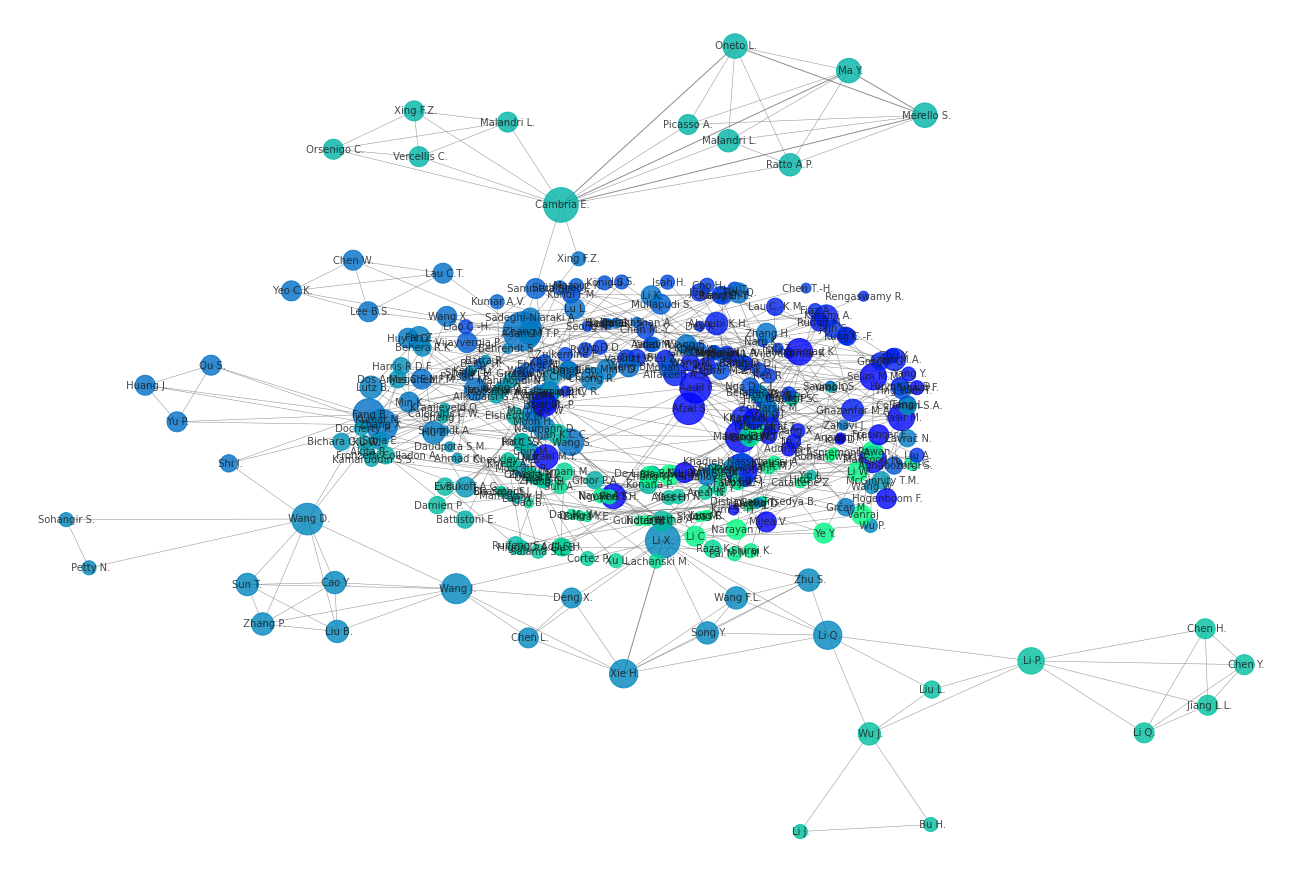

In [ ]:
# visualize
nx.draw_kamada_kawai(graph_authors, with_labels = True, font_size = 10, node_color=list(partition_authors.values()), node_size=[v * 100 for v in dict(graph_authors.degree()).values()], width=[v*0.5 for v in nx.get_edge_attributes(graph_authors,'weight').values()], edge_color = "#737373", alpha = .8, cmap = "winter")

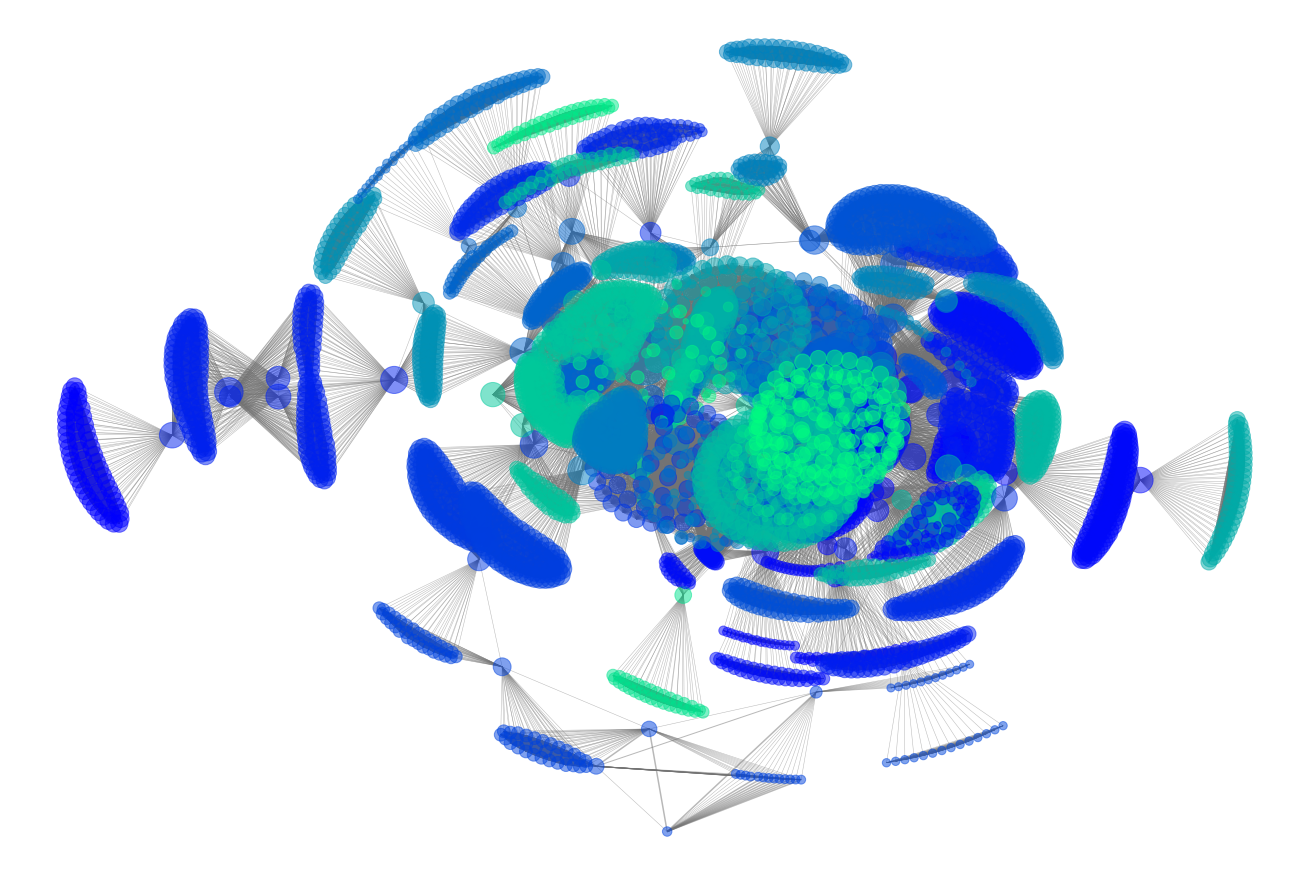

In [ ]:
nx.draw_kamada_kawai(graph_references_nondir, node_color=list(partition_references.values()), node_size=[v * 5 for v in dict(graph_references_nondir.degree()).values()], width=[v*0.5 for v in nx.get_edge_attributes(graph_references_nondir,'weight').values()], edge_color = "#737373", alpha = .5, cmap = "winter")